<a href="https://colab.research.google.com/github/otienomaurice1/Getting_Into_Business/blob/main/Getting_into_Business.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GETTING INTO REAL ESTATE BUSINESS IN THE US
This project is geared towards extracting and analyzing data with regard to housing  prices in the United states for those considering Real estate investment.It is imperative to have an indepth understanding of this knowledge to drive decisions that would ensure profitable investments. A data set from "https://www.kaggle.com/datasets/fratzcan/usa-house-prices" is used as the basis for this exploration and analysis.
As a side note, for purposes of this study, the data set was downloaded into a local machine and uploaded to google collab for analysis. The zip file for the downloaded data set can be found at "https://github.com/otienomaurice1/Getting_Into_Business.git" for inclusion too.


#loading the Data set from directory
This block of code loads the data onto colab. It imports the data as a CSV file and prints the first five rows and the column names for verification of successful importation. This block also imports libraries that would be used thtoughout the code.

In [18]:
from google.colab import files
files.upload()  # Upload kaggle.json manually

import zipfile
import pandas as pd
import os
from prettytable import PrettyTable  # Import PrettyTable
from IPython.display import clear_output
# Install PrettyTable if it's not already installed
!pip install prettytable

# Define file paths
zip_file = "Business.zip"
extract_folder = "usa_house_prices"

# Extract the ZIP file safely
try:
    with zipfile.ZipFile(zip_file, "r") as zip_ref:
        zip_ref.extractall(extract_folder)
except FileNotFoundError:
    print("Error: ZIP file not found. Make sure you downloaded it.")

# List extracted files
extracted_files = os.listdir(extract_folder)
print("Extracted Files:", extracted_files)

# Detect CSV file safely
# Detect CSV file safely
csv_files = [file for file in extracted_files if file.endswith(".csv")]
if not csv_files:
    raise FileNotFoundError("No CSV file found in the extracted folder.")

# Load the first detected CSV file
csv_path = os.path.join(extract_folder, csv_files[0])
df = pd.read_csv(csv_path)

# Display dataset overview
print("Dataset Loaded Successfully!")
print(df.info())
print(df.head())  # Show first few rows

Saving Business.zip to Business.zip
Extracted Files: ['USA Housing Dataset.csv', 'Capstone1 (1).ipynb']
Dataset Loaded Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city   

#What information is present in the data set?
**Date:** The date when the property was sold. This feature helps in understanding
the temporal trends in property prices.

**Price:**The sale price of the property in USD. This is the target variable we aim
to predict.


The number of bedrooms in the property. Generally, properties with
more bedrooms tend to have higher prices.


**Bathrooms:** The number of bathrooms in the property. Similar to bedrooms,
more bathrooms can increase a property’s value.


**Sqft Living:** The size of the living area in square feet. Larger living areas are
typically associated with higher property values.


**Sqft Lot:**The size of the lot in square feet. Larger lots may increase a property’s
desirability and value.


**Floors:** The number of floors in the property. Properties with multiple floors may
offer more living space and appeal.


**Waterfront:** A binary indicator (1 if the property has a waterfront view, 0 other-
wise). Properties with waterfront views are often valued higher.

**View:** An index from 0 to 4 indicating the quality of the property’s view. Better
views are likely to enhance a property’s value.


**Condition:** An index from 1 to 5 rating the condition of the property. Properties
in better condition are typically worth more.


**Sqft Above:** The square footage of the property above the basement. This can
help isolate the value contribution of above-ground space.


**Sqft Basement:** The square footage of the basement. Basements may add value
depending on their usability.


**Yr Built:** The year the property was built. Older properties may have historical
value, while newer ones may offer modern amenities.


**Yr Renovated:** The year the property was last renovated. Recent renovations can
increase a property’s appeal and value.


**Street:** The street address of the property. This feature can be used to analyze
location-specific price trends.


**City:** The city where the property is located. Different cities have distinct market
dynamics.


**Statezip:** The state and zip code of the property. This feature provides regional
context for the property.


**Country:** The country where the property is located. While this dataset focuses
on properties in Australia, this feature is included for completeness


In [26]:
###code
#The following block of code prints the column tiles i.e. the names of the data points represented in the dataset
colnames=(df.columns)  # Print the column names


# Create a DataFrame with column names as a single column
col_table = pd.DataFrame({"Column Names": df.columns})

# Print the table in markdown format
print(col_table.to_markdown(index=False))


| Column Names   |
|:---------------|
| date           |
| price          |
| bedrooms       |
| bathrooms      |
| sqft_living    |
| sqft_lot       |
| floors         |
| waterfront     |
| view           |
| condition      |
| sqft_above     |
| sqft_basement  |
| yr_built       |
| yr_renovated   |
| street         |
| city           |
| statezip       |
| country        |


#Attribute data type
Date,yr_built and yr_renovated are interval data types. The country, city, statezip and street are unique and so are nominal. Every other attribute left in the data set is of the ratio type and will be the subject of numerical anlysis.

In [30]:
# Function to classify attributes
def classify_data_type(column, column_name):
    # Check if the column name contains "date" or starts with "yr"
    if "date" in column_name.lower() or column_name.lower().startswith("yr"):
        return "Interval"

    # Check if the column name contains "country"
    if "country" in column_name.lower():
        return "Nominal"

    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(column):
        # Check if it's a ratio or interval
        # Assume that if values are non-negative and have a true zero, it's ratio.
        if column.min() >= 0:
            return "Ratio"
        else:
            return "Interval"
    # Check if the column is categorical
    elif pd.api.types.is_categorical_dtype(column) or column.dtype == "object":
        # Check if the column has a meaningful order (ordinal) or not (nominal)
        if column.nunique() <= 5:  # Consider as ordinal if few unique categories
            return "Ordinal"
        else:
            return "Nominal"
    # In case it doesn't fit the criteria
    return "Unknown"

# Create a PrettyTable object for displaying results
table = PrettyTable()
table.field_names = ["Attribute", "Data Type"]

# Loop through each column in the dataframe and classify it
for column in df.columns:
    data_type = classify_data_type(df[column], column)
    table.add_row([column, data_type])

# Print the table with attribute classifications
print(table)

+---------------+-----------+
|   Attribute   | Data Type |
+---------------+-----------+
|      date     |  Interval |
|     price     |   Ratio   |
|    bedrooms   |   Ratio   |
|   bathrooms   |   Ratio   |
|  sqft_living  |   Ratio   |
|    sqft_lot   |   Ratio   |
|     floors    |   Ratio   |
|   waterfront  |   Ratio   |
|      view     |   Ratio   |
|   condition   |   Ratio   |
|   sqft_above  |   Ratio   |
| sqft_basement |   Ratio   |
|    yr_built   |  Interval |
|  yr_renovated |  Interval |
|     street    |  Nominal  |
|      city     |  Nominal  |
|    statezip   |  Nominal  |
|    country    |  Nominal  |
+---------------+-----------+


<ipython-input-30-4a43c7fe698e>:20: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(column) or column.dtype == "object":


#When was the data acquired ?

The data was found to have been acquired between February 5th and July tenth of 2024 . The data set was last updated to kaggle by Firat Ozcan 8 months back from the 27th of March 2025.

In [20]:

# Find the earliest (min) and latest (max) date
start_date = df['date'].min()
end_date = df['date'].max()

print("Date Range:", start_date, "to", end_date)

Date Range: 2014-05-02 00:00:00 to 2014-07-10 00:00:00


#Where was the data collected?
The study focused on acquiring data throughout the unit states. The state information including the zip codes are shown in the table below.

In [21]:
# Find the area where the data is collected in
city = df['city']
zipc=df['statezip']
country=df['country']
collection=city+zipc+country
print(collection)

0         SeattleWA 98103USA
1       CarnationWA 98014USA
2        IssaquahWA 98029USA
3         SeattleWA 98117USA
4         SeattleWA 98146USA
                ...         
4135      SeattleWA 98133USA
4136     BellevueWA 98007USA
4137       RentonWA 98059USA
4138      SeattleWA 98178USA
4139    CovingtonWA 98042USA
Length: 4140, dtype: object


#Statistical Analysis

This block of code calculates the mean, median, mode, range, and standard deviation for the data attributes that are numerical values


In [33]:
# Function to classify attributes (same as previous code)
def classify_data_type(column, column_name):
    # Check if the column name contains "date" or starts with "yr"
    if "date" in column_name.lower() or column_name.lower().startswith("yr"):
        return "Interval"

    # Check if the column name contains "country"
    if "country" in column_name.lower():
        return "Ordinal"

    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(column):
        # Check if it's a ratio or interval
        # Assume that if values are non-negative and have a true zero, it's ratio.
        if column.min() >= 0:
            return "Ratio"
        else:
            return "Interval"
    # Check if the column is categorical
    elif pd.api.types.is_categorical_dtype(column) or column.dtype == "object":
        # Check if the column has a meaningful order (ordinal) or not (nominal)
        if column.nunique() <= 5:  # Consider as ordinal if few unique categories
            return "Ordinal"
        else:
            return "Nominal"
    # In case it doesn't fit the criteria
    return "Unknown"

# Function to calculate and display statistics for ratio attributes
def calculate_ratio_statistics(df):
    # Create a PrettyTable object for displaying results
    table = PrettyTable()
    table.field_names = ["Attribute", "Mean", "Median", "Range", "Mode", "Standard Deviation"]

    # Loop through each column in the dataframe
    for column in df.columns:
        # Classify the data type first
        data_type = classify_data_type(df[column], column)

        # If the column is classified as "Ratio"
        if data_type == "Ratio":
            mean = round(df[column].mean(), 2)
            median = round(df[column].median(), 2)
            range_val = round(df[column].max() - df[column].min(), 2)
            mode = round(df[column].mode()[0], 2)  # Mode can have multiple values, get the first
            std_dev = round(df[column].std(), 2)

            # Add the calculated statistics to the table
            table.add_row([column, mean, median, range_val, mode, std_dev])

    # Print the table with the statistics
    print(table)

# Load the dataset
df = pd.read_csv(csv_path)

# Call the function to calculate and display statistics for ratio data types
calculate_ratio_statistics(df)

+---------------+-----------+----------+------------+------+--------------------+
|   Attribute   |    Mean   |  Median  |   Range    | Mode | Standard Deviation |
+---------------+-----------+----------+------------+------+--------------------+
|     price     | 553062.88 | 460000.0 | 26590000.0 | 0.0  |     583686.45      |
|    bedrooms   |    3.4    |   3.0    |    8.0     | 3.0  |        0.9         |
|   bathrooms   |    2.16   |   2.25   |    6.75    | 2.5  |        0.78        |
|  sqft_living  |  2143.64  |  1980.0  |    9670    | 1720 |       957.48       |
|    sqft_lot   |  14697.64 |  7676.0  |  1073580   | 5000 |      35876.84      |
|     floors    |    1.51   |   1.5    |    2.5     | 1.0  |        0.53        |
|   waterfront  |    0.01   |   0.0    |     1      |  0   |        0.09        |
|      view     |    0.25   |   0.0    |     4      |  0   |        0.79        |
|   condition   |    3.45   |   3.0    |     4      |  3   |        0.68        |
|   sqft_above  

<ipython-input-33-eae02d5b6006>:20: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(column) or column.dtype == "object":


##**Mean,Median and Range of  Prices**
From the above table, the mean price was found out to be 553,062 us dollars slightly higher than the median price that is about 460,000 us dollars.

#City comparison by price, bedrooms and floors

+------+--------------------+---------------+------------------+----------------+---------------------------+-------------------------+
| Rank |        City        | Average Price | Average Bedrooms | Average Floors | Average Price per Bedroom | Average Price per Floor |
+------+--------------------+---------------+------------------+----------------+---------------------------+-------------------------+
|  1   |       Medina       |   2046559.09  |       4.09       |      1.64      |          500270.0         |        1250675.0        |
|  2   |     Clyde Hill     |   1343140.0   |       4.2        |      1.2       |         319795.24         |        1119283.33       |
|  3   |    Yarrow Point    |   1194837.5   |       3.75       |      2.0       |         318623.33         |        597418.75        |
|  4   |   Mercer Island    |   1111306.36  |       4.07       |      1.6       |          272775.2         |        695102.82        |
|  5   |      Bellevue      |    861636.5   |   

<ipython-input-70-dadd4631fc67>:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_cities['city'], rotation=45, ha='right')
<ipython-input-70-dadd4631fc67>:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(bottom_cities['city'], rotation=45, ha='right')


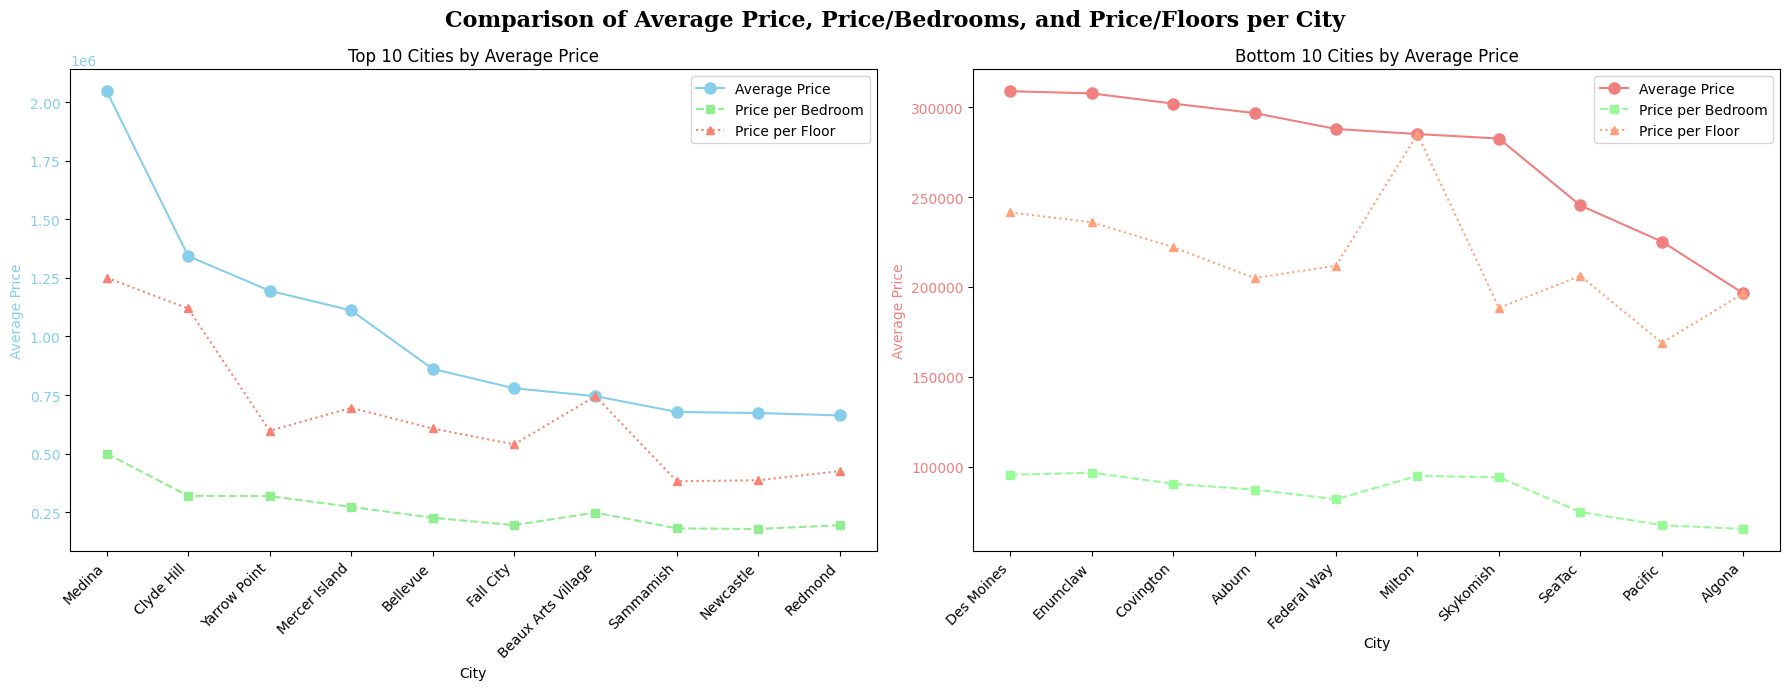

<ipython-input-70-dadd4631fc67>:131: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_10_cities_by_price['city'], rotation=45, ha='right')


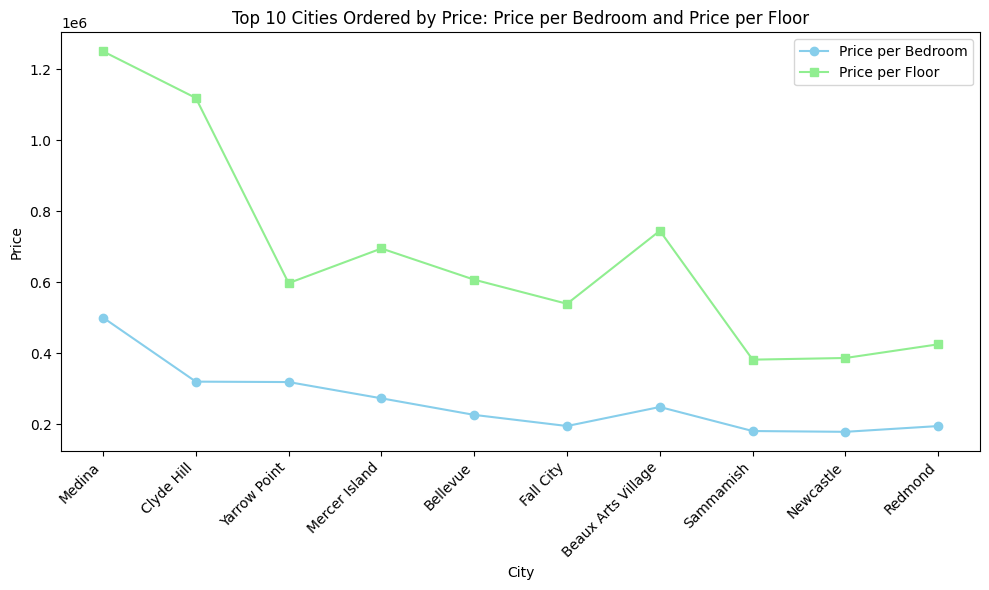

In [70]:

# Assuming 'df' is the DataFrame and 'city', 'price', 'bedrooms', 'floors' are the relevant columns

# Group by 'city' and calculate the average price, bedrooms, and floors for each city
city_summary = df.groupby('city').agg(
    avg_price=('price', 'mean'),
    avg_bedrooms=('bedrooms', 'mean'),
    avg_floors=('floors', 'mean')
).reset_index()

# Calculate the average price per bedroom and per floor
city_summary['avg_price_per_bedroom'] = city_summary['avg_price'] / city_summary['avg_bedrooms']
city_summary['avg_price_per_floor'] = city_summary['avg_price'] / city_summary['avg_floors']

# Sort by average price in descending order for the top cities and ascending order for the bottom cities
top_10_cities = city_summary.sort_values(by='avg_price', ascending=False).head(10)
bottom_10_cities = city_summary.sort_values(by='avg_price', ascending=True).head(10)

# Create a PrettyTable object for displaying results
table = PrettyTable()
table.field_names = ["Rank", "City", "Average Price", "Average Bedrooms", "Average Floors",
                     "Average Price per Bedroom", "Average Price per Floor"]

# Add top 10 cities with the highest average prices
for idx, row in enumerate(top_10_cities.iterrows(), 1):
    table.add_row([idx, row[1]['city'], round(row[1]['avg_price'], 2), round(row[1]['avg_bedrooms'], 2),
                   round(row[1]['avg_floors'], 2), round(row[1]['avg_price_per_bedroom'], 2),
                   round(row[1]['avg_price_per_floor'], 2)])

# Add a divider to separate top and bottom cities
table.add_row(["---", "---", "---", "---", "---", "---", "---"])

# Add bottom 10 cities with the lowest average prices
for idx, row in enumerate(bottom_10_cities.iterrows(), 1):
    table.add_row([idx, row[1]['city'], round(row[1]['avg_price'], 2), round(row[1]['avg_bedrooms'], 2),
                   round(row[1]['avg_floors'], 2), round(row[1]['avg_price_per_bedroom'], 2),
                   round(row[1]['avg_price_per_floor'], 2)])

# Print the table with the cities, average prices, bedrooms, floors, price per bedroom, and price per floor
print(table)

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame and 'city', 'price', 'bedrooms', 'floors' are the relevant columns

# Group by 'city' and calculate the average price, bedrooms, and floors for each city
city_summary = df.groupby('city').agg(
    avg_price=('price', 'mean'),
    avg_bedrooms=('bedrooms', 'mean'),
    avg_floors=('floors', 'mean')
).reset_index()

# Calculate the price per bedroom and price per floor
city_summary['price_per_bedroom'] = city_summary['avg_price'] / city_summary['avg_bedrooms']
city_summary['price_per_floor'] = city_summary['avg_price'] / city_summary['avg_floors']

# Sort by average price in descending order for the top cities
city_summary = city_summary.sort_values(by='avg_price', ascending=False)

# Separate top 10 and bottom 10 cities
top_cities = city_summary.head(10)
bottom_cities = city_summary.tail(10)

# Create a figure and axis for side-by-side graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))  # 1 row, 2 columns

# Top Cities Plot
ax1.plot(top_cities['city'], top_cities['avg_price'], color='skyblue', label='Average Price', marker='o', linestyle='-', markersize=8)
ax1.set_xlabel('City')
ax1.set_ylabel('Average Price', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(top_cities['city'], rotation=45, ha='right')
ax1.set_title('Top 10 Cities by Average Price')

# Add price per bedroom and price per floor for top cities
ax1.plot(top_cities['city'], top_cities['price_per_bedroom'], color='lightgreen', label='Price per Bedroom', marker='s', linestyle='--', markersize=6)
ax1.plot(top_cities['city'], top_cities['price_per_floor'], color='salmon', label='Price per Floor', marker='^', linestyle=':', markersize=6)

ax1.legend()

# Bottom Cities Plot
ax2.plot(bottom_cities['city'], bottom_cities['avg_price'], color='lightcoral', label='Average Price', marker='o', linestyle='-', markersize=8)
ax2.set_xlabel('City')
ax2.set_ylabel('Average Price', color='lightcoral')
ax2.tick_params(axis='y', labelcolor='lightcoral')
ax2.set_xticklabels(bottom_cities['city'], rotation=45, ha='right')
ax2.set_title('Bottom 10 Cities by Average Price')

# Add price per bedroom and price per floor for bottom cities
ax2.plot(bottom_cities['city'], bottom_cities['price_per_bedroom'], color='palegreen', label='Price per Bedroom', marker='s', linestyle='--', markersize=6)
ax2.plot(bottom_cities['city'], bottom_cities['price_per_floor'], color='lightsalmon', label='Price per Floor', marker='^', linestyle=':', markersize=6)

ax2.legend()

# Title and layout adjustments
plt.suptitle('Comparison of Average Price, Price/Bedrooms, and Price/Floors per City', fontsize=16, fontweight='bold', family='serif')
fig.tight_layout()

# Display the plot
plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame and 'city', 'price', 'bedrooms', 'floors' are the relevant columns

# Group by 'city' and calculate the average price, bedrooms, and floors for each city
city_summary = df.groupby('city').agg(
    avg_price=('price', 'mean'),
    avg_bedrooms=('bedrooms', 'mean'),
    avg_floors=('floors', 'mean')
).reset_index()

# Calculate the price per bedroom and price per floor
city_summary['price_per_bedroom'] = city_summary['avg_price'] / city_summary['avg_bedrooms']
city_summary['price_per_floor'] = city_summary['avg_price'] / city_summary['avg_floors']

# Sort cities by average price in descending order and select the top 10
top_10_cities_by_price = city_summary.nlargest(10, 'avg_price')

# Plot the price per bedroom and price per floor for the top 10 cities
fig, ax = plt.subplots(figsize=(10, 6))

# Plot price per bedroom with a line plot for top 10 cities ordered by price
ax.plot(top_10_cities_by_price['city'], top_10_cities_by_price['price_per_bedroom'], color='skyblue', label='Price per Bedroom', marker='o', linestyle='-', markersize=6)

# Plot price per floor with a line plot for top 10 cities ordered by price
ax.plot(top_10_cities_by_price['city'], top_10_cities_by_price['price_per_floor'], color='lightgreen', label='Price per Floor', marker='s', linestyle='-', markersize=6)

# Rotate x-axis labels for better readability
ax.set_xticklabels(top_10_cities_by_price['city'], rotation=45, ha='right')

# Add labels and title
ax.set_xlabel('City')
ax.set_ylabel('Price')
ax.set_title('Top 10 Cities Ordered by Price: Price per Bedroom and Price per Floor')

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


From the above table we can see that Medina city has the highest average price in houses while Algona has the lowest. Medina also has the highest price per floor and per bedroom of all the cities. This might suggest a higher returns for inverstors. Algona has the lowest price and lowest price per bedroom or floor giving smaller returns for investors.

In [40]:

# Assuming 'df' is the DataFrame and 'city', 'condition' are the relevant columns
# Group by 'city' and calculate the average condition for each city
average_condition_per_city = df.groupby('city')['condition'].mean().reset_index()

# Sort by average condition in descending order for the top cities and ascending order for the bottom cities
top_10_cities_condition = average_condition_per_city.sort_values(by='condition', ascending=False).head(10)
bottom_10_cities_condition = average_condition_per_city.sort_values(by='condition', ascending=True).head(10)

# Create a PrettyTable object for displaying results
table = PrettyTable()
table.field_names = ["Rank", "City", "Average Condition"]

# Add top 10 cities with the highest average conditions
for idx, row in enumerate(top_10_cities_condition.iterrows(), 1):
    table.add_row([idx, row[1]['city'], round(row[1]['condition'], 2)])

# Add a divider to separate top and bottom cities
table.add_row(["---", "---", "---"])

# Add bottom 10 cities with the lowest average conditions
for idx, row in enumerate(bottom_10_cities_condition.iterrows(), 1):
    table.add_row([idx, row[1]['city'], round(row[1]['condition'], 2)])

# Print the table with the cities and average conditions
print(table)

+------+--------------------+-------------------+
| Rank |        City        | Average Condition |
+------+--------------------+-------------------+
|  1   |      Preston       |        4.5        |
|  2   |       Milton       |        4.0        |
|  3   | Beaux Arts Village |        4.0        |
|  4   |      Enumclaw      |        3.93       |
|  5   |   Normandy Park    |        3.81       |
|  6   |   Mercer Island    |        3.79       |
|  7   |    Yarrow Point    |        3.75       |
|  8   |     Newcastle      |        3.68       |
|  9   |     Shoreline      |        3.66       |
|  10  |     Covington      |        3.64       |
| ---  |        ---         |        ---        |
|  1   |       Algona       |        3.0        |
|  2   |  Snoqualmie Pass   |        3.0        |
|  3   |     Snoqualmie     |        3.03       |
|  4   |      Tukwila       |        3.04       |
|  5   |       Duvall       |        3.05       |
|  6   |     Carnation      |        3.11       |


#Comparison by floors


In [41]:
# Assuming 'df' is the DataFrame and 'city' and 'floors' are the relevant columns
# Group by 'city' and calculate the average number of floors for each city
average_floors_per_city = df.groupby('city')['floors'].mean().reset_index()

# Sort by average number of floors in descending order for the top cities and ascending order for the bottom cities
top_10_cities_floors = average_floors_per_city.sort_values(by='floors', ascending=False).head(10)
bottom_10_cities_floors = average_floors_per_city.sort_values(by='floors', ascending=True).head(10)

# Create a PrettyTable object for displaying results
table = PrettyTable()
table.field_names = ["Rank", "City", "Average Floors"]

# Add top 10 cities with the highest average floors
for idx, row in enumerate(top_10_cities_floors.iterrows(), 1):
    table.add_row([idx, row[1]['city'], round(row[1]['floors'], 2)])

# Add a divider to separate top and bottom cities
table.add_row(["---", "---", "---"])

# Add bottom 10 cities with the lowest average floors
for idx, row in enumerate(bottom_10_cities_floors.iterrows(), 1):
    table.add_row([idx, row[1]['city'], round(row[1]['floors'], 2)])

# Print the table with the cities and average number of floors
print(table)

+------+--------------------+----------------+
| Rank |        City        | Average Floors |
+------+--------------------+----------------+
|  1   |  Snoqualmie Pass   |      2.0       |
|  2   |    Yarrow Point    |      2.0       |
|  3   |     Snoqualmie     |      1.88      |
|  4   |      Issaquah      |      1.82      |
|  5   |    Maple Valley    |      1.79      |
|  6   |     Sammamish      |      1.78      |
|  7   |      Preston       |      1.75      |
|  8   |     Ravensdale     |      1.75      |
|  9   |     Newcastle      |      1.74      |
|  10  |       Duvall       |      1.67      |
| ---  |        ---         |      ---       |
|  1   |       Algona       |      1.0       |
|  2   | Beaux Arts Village |      1.0       |
|  3   |       Milton       |      1.0       |
|  4   |   Normandy Park    |      1.06      |
|  5   |       SeaTac       |      1.19      |
|  6   |     Clyde Hill     |      1.2       |
|  7   |     Shoreline      |      1.21      |
|  8   |  Lak

#Missing values
The data set is not perfect and has missing values. For purposes of this analysis, entities with a 0 or NAN are considered missing.
This because for some attributes like year, we don't have a true zero, that would be unrealistic.

+---------------+----------------------+
|   Attribute   | Missing Values Count |
+---------------+----------------------+
|     price     |          49          |
|    bedrooms   |          2           |
|   bathrooms   |          2           |
|   waterfront  |         4109         |
|      view     |         3722         |
| sqft_basement |         2476         |
|  yr_renovated |         2462         |
+---------------+----------------------+


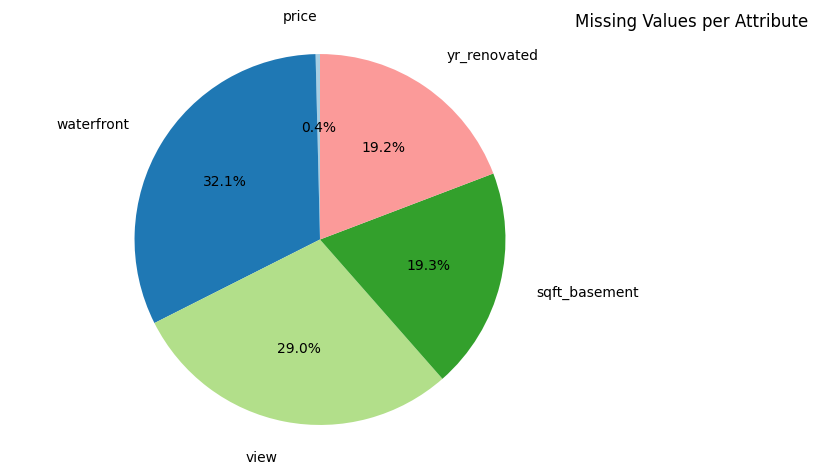

In [53]:
import pandas as pd
from prettytable import PrettyTable

# Assuming 'df' is the DataFrame
# Replace 0 with NaN to treat it as a missing value
df_with_missing = df.replace(0, pd.NA)

# Identify missing values (NaN or 0)
missing_values = df_with_missing.isna().sum()

# Create a PrettyTable object for displaying results
table = PrettyTable()
table.field_names = ["Attribute", "Missing Values Count"]

# Add rows for each attribute with missing values
for column, missing_count in missing_values.items():
    if missing_count > 0:  # Only display attributes with missing values
        table.add_row([column, missing_count])

# Print the table with the count of missing values per attribute
print(table)

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame
# Replace 0 with NaN to treat it as a missing value
df_with_missing = df.replace(0, pd.NA)

# Identify missing values (NaN or 0)
missing_values = df_with_missing.isna().sum()

# Filter the columns that have missing values
missing_values = missing_values[missing_values > 0]

# Remove 'bathrooms' and 'bedrooms' from the list
missing_values = missing_values[~missing_values.index.isin(['bathrooms', 'bedrooms'])]

# Plot a pie chart for missing values per attribute
plt.figure(figsize=(8, 6))

# Adjust the positioning of the pie chart (move it down)
plt.subplots_adjust(bottom=0.2)

# Plot the pie chart
# Adjust the labeldistance for the labels' distance from the center of the pie chart
plt.pie(missing_values, labels=missing_values.index, autopct='%1.1f%%', startangle=90,
        colors=plt.cm.Paired.colors, labeldistance=1.2)  # Adjust label distance

# Move the title to the side (horizontal shift by 10 times)
plt.title('Missing Values per Attribute', x=1.1)  # Adjust x value for horizontal shift

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()



The pie chart above shows the distribution of missing values per attribute. Waterfront has a 32 % missing value percentage  followed by the view at 29.0. This may be informed by the difficulty in assessing the view and different standards for the view. It is also generally difficult to identify the year of renovation of each of each house hence a 19.2 percent missing value rate.
Notice that we have the least anount of missing values in number of bedrooms, and bathrooms with only two. These can be safely discarded without compromissing our analysis.
It is however difficult to discard missing values for watefront view and view. We would therefore generally fill it in with the mean view of 0.25 rather than median in this case because we dont have anything in the median view.

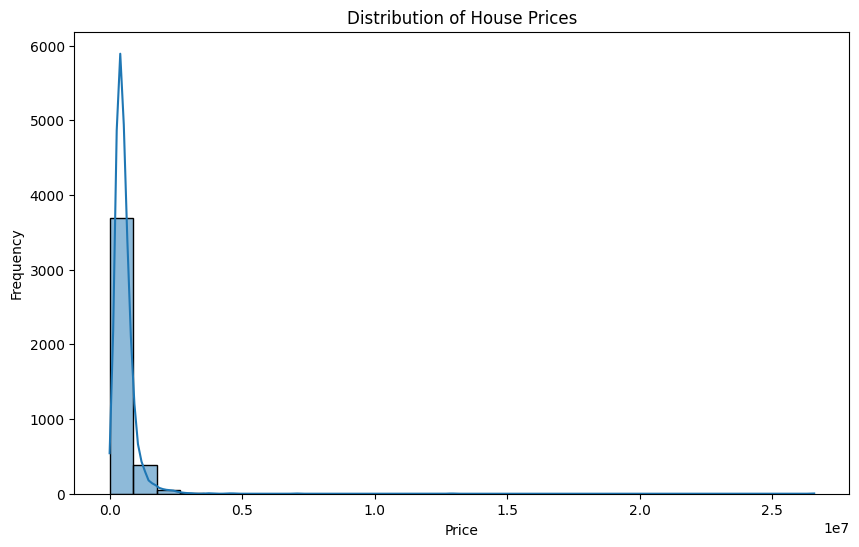

In [ ]:
# Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

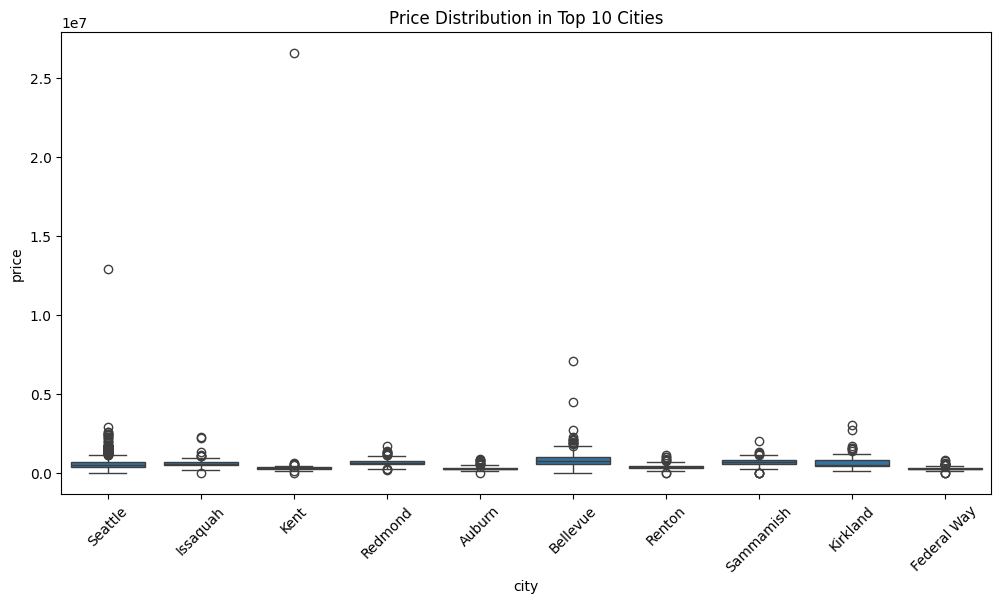

In [ ]:
# Price by Top 10 Cities
top_cities = df['city'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(x='city', y='price', data=df[df['city'].isin(top_cities)])
plt.title('Price Distribution in Top 10 Cities')
plt.xticks(rotation=45)
plt.show()

## Correlation Analysis
It is of importance to determine how prices are correlated to other entities from the data set. This would provide a general sense of
Here we are goignt ot explire if any of the features are corrected to each other to have a better understing of X.

The price of housing generally increases with

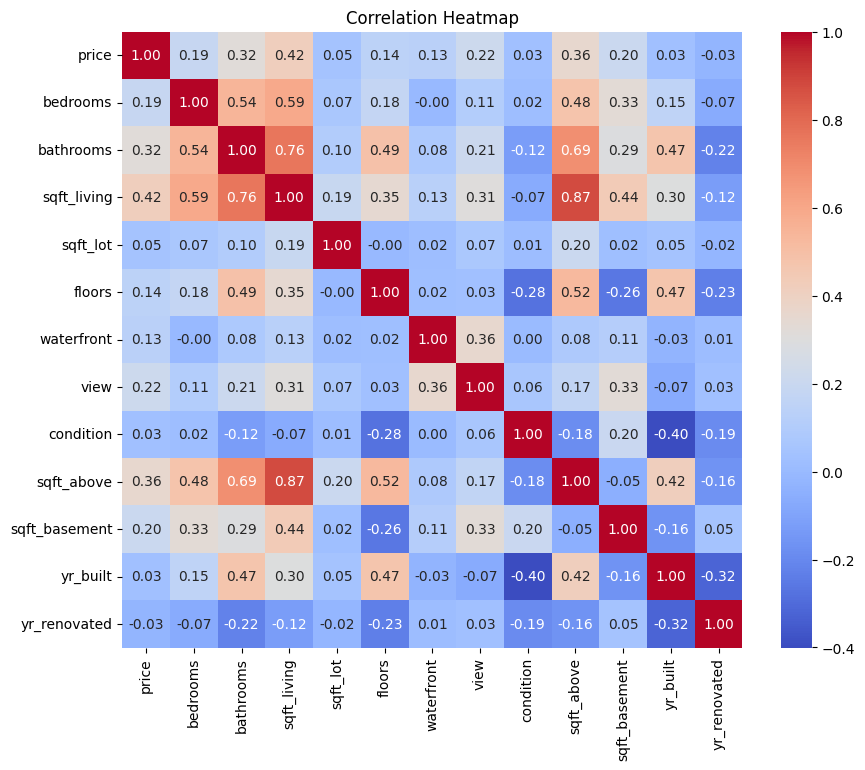

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

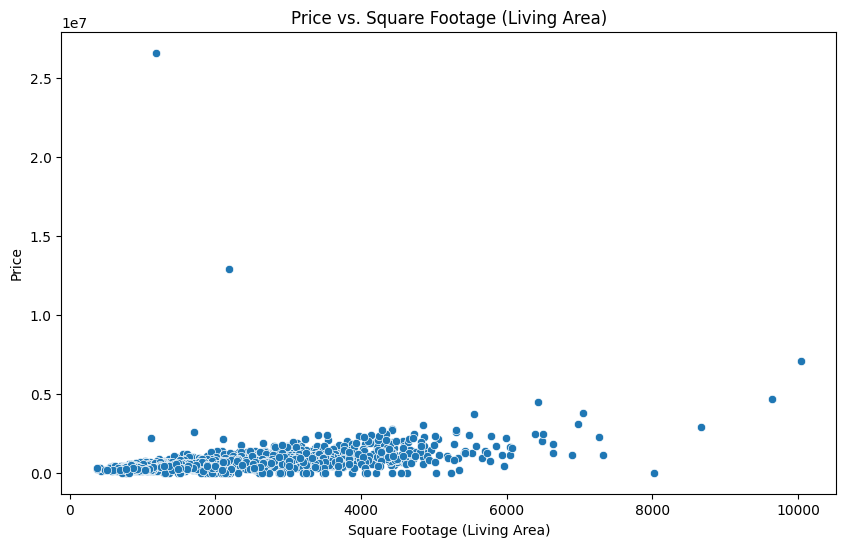

In [ ]:
# Scatter Plot: Price vs. Square Footage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Price vs. Square Footage (Living Area)')
plt.xlabel('Square Footage (Living Area)')
plt.ylabel('Price')
plt.show()

# 3. Expanding YOur Investubt



In [25]:
#!jupyter nbconvert --to markdown Getting_into_Business.ipynb
!wget https://raw.githubusercontent.com/otienomaurice1/Getting_Into_Business/main/Getting_into_Business.ipynb
!jupyter nbconvert --to markdown Getting_into_Business.ipynb --output README
from IPython.display import Markdown

# Display the contents of README.md
with open("README.md", "r") as file:
    display(Markdown(file.read()))


--2025-03-27 02:00:39--  https://raw.githubusercontent.com/otienomaurice1/Getting_Into_Business/main/Getting_into_Business.ipynb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 497464 (486K) [text/plain]
Saving to: ‘Getting_into_Business.ipynb.5’

Getting_into_Busine 100%[===================>] 485.80K  --.-KB/s    in 0.05s   

2025-03-27 02:00:39 (10.1 MB/s) - ‘Getting_into_Business.ipynb.5’ saved [497464/497464]

[NbConvertApp] Converting notebook Getting_into_Business.ipynb to markdown
[NbConvertApp] Support files will be in README_files/
[NbConvertApp] Writing 44024 bytes to README.md


<a href="https://colab.research.google.com/github/otienomaurice1/Getting_Into_Business/blob/main/Getting_into_Business.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GETTING INTO REAL ESTATE BUSINESS IN THE US
This project is geared towards extracting and analyzing data with regard to housing  prices in the United states for those considering Real estate investment.It is imperative to have an indepth understanding of this knowledge to drive decisions that would ensure profitable investments. A data set from "https://www.kaggle.com/datasets/fratzcan/usa-house-prices" is used as the basis for this exploration and analysis.



#loading the Data set from directory
This block of code loads the data onto colab. It imports the data as a CSV file and prints the first five rows and the column names for verification of successful importation. This block also imports libraries that would be used thtoughout the code.


```python
from google.colab import files
files.upload()  # Upload kaggle.json manually

import zipfile
import pandas as pd
import os
from IPython.display import clear_output
# Install PrettyTable if it's not already installed
!pip install prettytable

# Define file paths
zip_file = "Business.zip"
extract_folder = "usa_house_prices"

# Extract the ZIP file safely
try:
    with zipfile.ZipFile(zip_file, "r") as zip_ref:
        zip_ref.extractall(extract_folder)
except FileNotFoundError:
    print("Error: ZIP file not found. Make sure you downloaded it.")

# List extracted files
extracted_files = os.listdir(extract_folder)
print("Extracted Files:", extracted_files)

# Detect CSV file safely
# Detect CSV file safely
csv_files = [file for file in extracted_files if file.endswith(".csv")]
if not csv_files:
    raise FileNotFoundError("No CSV file found in the extracted folder.")

# Load the first detected CSV file
csv_path = os.path.join(extract_folder, csv_files[0])
df = pd.read_csv(csv_path)

# Display dataset overview
print("Dataset Loaded Successfully!")
print(df.info())
print(df.head())  # Show first few rows
```



     <input type="file" id="files-e83698e2-e6f6-4a79-a657-f3d55c8eedbc" name="files[]" multiple disabled
        style="border:none" />
     <output id="result-e83698e2-e6f6-4a79-a657-f3d55c8eedbc">
      Upload widget is only available when the cell has been executed in the
      current browser session. Please rerun this cell to enable.
      </output>
      <script>// Copyright 2017 Google LLC
//
// Licensed under the Apache License, Version 2.0 (the "License");
// you may not use this file except in compliance with the License.
// You may obtain a copy of the License at
//
//      http://www.apache.org/licenses/LICENSE-2.0
//
// Unless required by applicable law or agreed to in writing, software
// distributed under the License is distributed on an "AS IS" BASIS,
// WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
// See the License for the specific language governing permissions and
// limitations under the License.

/**
 * @fileoverview Helpers for google.colab Python module.
 */
(function(scope) {
function span(text, styleAttributes = {}) {
  const element = document.createElement('span');
  element.textContent = text;
  for (const key of Object.keys(styleAttributes)) {
    element.style[key] = styleAttributes[key];
  }
  return element;
}

// Max number of bytes which will be uploaded at a time.
const MAX_PAYLOAD_SIZE = 100 * 1024;

function _uploadFiles(inputId, outputId) {
  const steps = uploadFilesStep(inputId, outputId);
  const outputElement = document.getElementById(outputId);
  // Cache steps on the outputElement to make it available for the next call
  // to uploadFilesContinue from Python.
  outputElement.steps = steps;

  return _uploadFilesContinue(outputId);
}

// This is roughly an async generator (not supported in the browser yet),
// where there are multiple asynchronous steps and the Python side is going
// to poll for completion of each step.
// This uses a Promise to block the python side on completion of each step,
// then passes the result of the previous step as the input to the next step.
function _uploadFilesContinue(outputId) {
  const outputElement = document.getElementById(outputId);
  const steps = outputElement.steps;

  const next = steps.next(outputElement.lastPromiseValue);
  return Promise.resolve(next.value.promise).then((value) => {
    // Cache the last promise value to make it available to the next
    // step of the generator.
    outputElement.lastPromiseValue = value;
    return next.value.response;
  });
}

/**
 * Generator function which is called between each async step of the upload
 * process.
 * @param {string} inputId Element ID of the input file picker element.
 * @param {string} outputId Element ID of the output display.
 * @return {!Iterable<!Object>} Iterable of next steps.
 */
function* uploadFilesStep(inputId, outputId) {
  const inputElement = document.getElementById(inputId);
  inputElement.disabled = false;

  const outputElement = document.getElementById(outputId);
  outputElement.innerHTML = '';

  const pickedPromise = new Promise((resolve) => {
    inputElement.addEventListener('change', (e) => {
      resolve(e.target.files);
    });
  });

  const cancel = document.createElement('button');
  inputElement.parentElement.appendChild(cancel);
  cancel.textContent = 'Cancel upload';
  const cancelPromise = new Promise((resolve) => {
    cancel.onclick = () => {
      resolve(null);
    };
  });

  // Wait for the user to pick the files.
  const files = yield {
    promise: Promise.race([pickedPromise, cancelPromise]),
    response: {
      action: 'starting',
    }
  };

  cancel.remove();

  // Disable the input element since further picks are not allowed.
  inputElement.disabled = true;

  if (!files) {
    return {
      response: {
        action: 'complete',
      }
    };
  }

  for (const file of files) {
    const li = document.createElement('li');
    li.append(span(file.name, {fontWeight: 'bold'}));
    li.append(span(
        `(${file.type || 'n/a'}) - ${file.size} bytes, ` +
        `last modified: ${
            file.lastModifiedDate ? file.lastModifiedDate.toLocaleDateString() :
                                    'n/a'} - `));
    const percent = span('0% done');
    li.appendChild(percent);

    outputElement.appendChild(li);

    const fileDataPromise = new Promise((resolve) => {
      const reader = new FileReader();
      reader.onload = (e) => {
        resolve(e.target.result);
      };
      reader.readAsArrayBuffer(file);
    });
    // Wait for the data to be ready.
    let fileData = yield {
      promise: fileDataPromise,
      response: {
        action: 'continue',
      }
    };

    // Use a chunked sending to avoid message size limits. See b/62115660.
    let position = 0;
    do {
      const length = Math.min(fileData.byteLength - position, MAX_PAYLOAD_SIZE);
      const chunk = new Uint8Array(fileData, position, length);
      position += length;

      const base64 = btoa(String.fromCharCode.apply(null, chunk));
      yield {
        response: {
          action: 'append',
          file: file.name,
          data: base64,
        },
      };

      let percentDone = fileData.byteLength === 0 ?
          100 :
          Math.round((position / fileData.byteLength) * 100);
      percent.textContent = `${percentDone}% done`;

    } while (position < fileData.byteLength);
  }

  // All done.
  yield {
    response: {
      action: 'complete',
    }
  };
}

scope.google = scope.google || {};
scope.google.colab = scope.google.colab || {};
scope.google.colab._files = {
  _uploadFiles,
  _uploadFilesContinue,
};
})(self);
</script> 


    Saving Business.zip to Business (1).zip
    Requirement already satisfied: prettytable in /usr/local/lib/python3.11/dist-packages (3.15.1)
    Requirement already satisfied: wcwidth in /usr/local/lib/python3.11/dist-packages (from prettytable) (0.2.13)
    Extracted Files: ['USA Housing Dataset.csv', 'Capstone1 (1).ipynb']
    Dataset Loaded Successfully!
    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 4140 entries, 0 to 4139
    Data columns (total 18 columns):
     #   Column         Non-Null Count  Dtype  
    ---  ------         --------------  -----  
     0   date           4140 non-null   object 
     1   price          4140 non-null   float64
     2   bedrooms       4140 non-null   float64
     3   bathrooms      4140 non-null   float64
     4   sqft_living    4140 non-null   int64  
     5   sqft_lot       4140 non-null   int64  
     6   floors         4140 non-null   float64
     7   waterfront     4140 non-null   int64  
     8   view           4140 non-null   int64  
     9   condition      4140 non-null   int64  
     10  sqft_above     4140 non-null   int64  
     11  sqft_basement  4140 non-null   int64  
     12  yr_built       4140 non-null   int64  
     13  yr_renovated   4140 non-null   int64  
     14  street         4140 non-null   object 
     15  city           4140 non-null   object 
     16  statezip       4140 non-null   object 
     17  country        4140 non-null   object 
    dtypes: float64(4), int64(9), object(5)
    memory usage: 582.3+ KB
    None
                      date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
    0  2014-05-09 00:00:00   376000.0       3.0       2.00         1340      1384   
    1  2014-05-09 00:00:00   800000.0       4.0       3.25         3540    159430   
    2  2014-05-09 00:00:00  2238888.0       5.0       6.50         7270    130017   
    3  2014-05-09 00:00:00   324000.0       3.0       2.25          998       904   
    4  2014-05-10 00:00:00   549900.0       5.0       2.75         3060      7015   
    
       floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
    0     3.0           0     0          3        1340              0      2008   
    1     2.0           0     0          3        3540              0      2007   
    2     2.0           0     0          3        6420            850      2010   
    3     2.0           0     0          3         798            200      2007   
    4     1.0           0     0          5        1600           1460      1979   
    
       yr_renovated                   street       city  statezip country  
    0             0  9245-9249 Fremont Ave N    Seattle  WA 98103     USA  
    1             0         33001 NE 24th St  Carnation  WA 98014     USA  
    2             0         7070 270th Pl SE   Issaquah  WA 98029     USA  
    3             0           820 NW 95th St    Seattle  WA 98117     USA  
    4             0        10834 31st Ave SW    Seattle  WA 98146     USA  


#What information is present in the data set?
Date: The date when the property was sold. This feature helps in understanding
the temporal trends in property prices.

Price:The sale price of the property in USD. This is the target variable we aim
to predict.


Bedrooms:The number of bedrooms in the property. Generally, properties with
more bedrooms tend to have higher prices.


Bathrooms: The number of bathrooms in the property. Similar to bedrooms,
more bathrooms can increase a property’s value.


Sqft Living: The size of the living area in square feet. Larger living areas are
typically associated with higher property values.


Sqft Lot:The size of the lot in square feet. Larger lots may increase a property’s
desirability and value.


Floors: The number of floors in the property. Properties with multiple floors may
offer more living space and appeal.


Waterfront: A binary indicator (1 if the property has a waterfront view, 0 other-
wise). Properties with waterfront views are often valued higher.
View: An index from 0 to 4 indicating the quality of the property’s view. Better
views are likely to enhance a property’s value.


Condition: An index from 1 to 5 rating the condition of the property. Properties
in better condition are typically worth more.


Sqft Above: The square footage of the property above the basement. This can
help isolate the value contribution of above-ground space.


Sqft Basement: The square footage of the basement. Basements may add value
depending on their usability.


Yr Built: The year the property was built. Older properties may have historical
value, while newer ones may offer modern amenities.


Yr Renovated: The year the property was last renovated. Recent renovations can
increase a property’s appeal and value.


Street: The street address of the property. This feature can be used to analyze
location-specific price trends.


City: The city where the property is located. Different cities have distinct market
dynamics.


Statezip: The state and zip code of the property. This feature provides regional
context for the property.


Country: The country where the property is located. While this dataset focuses
on properties in Australia, this feature is included for completeness
This block of code prints the column tiles i.e. the names of the data points represented in the dataset


```python
colnames=(df.columns)  # Print the column names


# Create a DataFrame with column names as a single column
col_table = pd.DataFrame({"Column Names": df.columns})

# Print the table in markdown format
print(col_table.to_markdown(index=False))

```

    | Column Names   |
    |:---------------|
    | date           |
    | price          |
    | bedrooms       |
    | bathrooms      |
    | sqft_living    |
    | sqft_lot       |
    | floors         |
    | waterfront     |
    | view           |
    | condition      |
    | sqft_above     |
    | sqft_basement  |
    | yr_built       |
    | yr_renovated   |
    | street         |
    | city           |
    | statezip       |
    | country        |


#When was the data acquired ?

The data was found to have been acquired between February 5th and July tenth of 2024 as illustrated by the below code segment.


```python

# Find the earliest (min) and latest (max) date
start_date = df['date'].min()
end_date = df['date'].max()

print("Date Range:", start_date, "to", end_date)
```

    Date Range: 2014-05-02 00:00:00 to 2014-07-10 00:00:00


#Heading

This block outputs the city, zip code, and country of the dataset


```python
# Find the area where the data is collected in
city = df['city']
zipc=df['statezip']
country=df['country']
collection=city+zipc+country
print(collection)
```

    0         SeattleWA 98103USA
    1       CarnationWA 98014USA
    2        IssaquahWA 98029USA
    3         SeattleWA 98117USA
    4         SeattleWA 98146USA
                    ...         
    4135      SeattleWA 98133USA
    4136     BellevueWA 98007USA
    4137       RentonWA 98059USA
    4138      SeattleWA 98178USA
    4139    CovingtonWA 98042USA
    Length: 4140, dtype: object


Heading

This block of code calculates the mean, median, mode, range, and standard deviation for the data attributes that are numerical values



```python

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Calculate and display mode
print("\nMode of Numerical Columns:")
for col in numerical_cols:
    print(f"{col}: {df[col].mode().values}")

# Calculate and display mean
print("\nMean of Numerical Columns:")
for col in numerical_cols:
    print(f"{col}: {df[col].mean()}")

# Calculate and display median
print("\nMedian of Numerical Columns:")
for col in numerical_cols:
    print(f"{col}: {df[col].median()}")

# Calculate and display range (max - min)
print("\nRange of Numerical Columns:")
for col in numerical_cols:
    print(f"{col}: {df[col].max() - df[col].min()}")

# Calculate and display standard deviation
print("\nStandard Deviation of Numerical Columns:")
for col in numerical_cols:
    print(f"{col}: {df[col].std()}")
from prettytable import PrettyTable  # Import PrettyTable
table = PrettyTable()

table.field_names = ["Feature", "Mean", "Median", "Mode", "Range","Std_deviation"]

for col in df.select_dtypes(include=["number"]).columns:
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode().iloc[0]
    range_val = df[col].max() - df[col].min()
    std_val=df[col].std()

    # Add feature name as the first element in the row

    table.add_row([col, round(mean_val, 2), round(median_val, 2), mode_val, round(range_val, 2), round(std_val, 2)])

# Print the table
print(table)

```

    
    Mode of Numerical Columns:
    price: [0.]
    bedrooms: [3.]
    bathrooms: [2.5]
    sqft_living: [1720]
    sqft_lot: [5000]
    floors: [1.]
    waterfront: [0]
    view: [0]
    condition: [3]
    sqft_above: [1200]
    sqft_basement: [0]
    yr_built: [2005 2006]
    yr_renovated: [0]
    
    Mean of Numerical Columns:
    price: 553062.8772890784
    bedrooms: 3.40048309178744
    bathrooms: 2.1630434782608696
    sqft_living: 2143.6388888888887
    sqft_lot: 14697.638164251208
    floors: 1.5141304347826088
    waterfront: 0.00748792270531401
    view: 0.2466183574879227
    condition: 3.4524154589371983
    sqft_above: 1831.3514492753623
    sqft_basement: 312.28743961352654
    yr_built: 1970.8140096618358
    yr_renovated: 808.3683574879227
    
    Median of Numerical Columns:
    price: 460000.0
    bedrooms: 3.0
    bathrooms: 2.25
    sqft_living: 1980.0
    sqft_lot: 7676.0
    floors: 1.5
    waterfront: 0.0
    view: 0.0
    condition: 3.0
    sqft_above: 1600.0
    sqft_basement: 0.0
    yr_built: 1976.0
    yr_renovated: 0.0
    
    Range of Numerical Columns:
    price: 26590000.0
    bedrooms: 8.0
    bathrooms: 6.75
    sqft_living: 9670
    sqft_lot: 1073580
    floors: 2.5
    waterfront: 1
    view: 4
    condition: 4
    sqft_above: 7650
    sqft_basement: 4820
    yr_built: 114
    yr_renovated: 2014
    
    Standard Deviation of Numerical Columns:
    price: 583686.452244623
    bedrooms: 0.9039387963928299
    bathrooms: 0.7847330168593593
    sqft_living: 957.4816210435177
    sqft_lot: 35876.83812300456
    floors: 0.5349408589117917
    waterfront: 0.08621861334035813
    view: 0.7906194807400658
    condition: 0.6785332028868124
    sqft_above: 861.3829469017649
    sqft_basement: 464.3492215480328
    yr_built: 29.807941184867335
    yr_renovated: 979.3805354455716
    +---------------+-----------+----------+------+------------+---------------+
    |    Feature    |    Mean   |  Median  | Mode |   Range    | Std_deviation |
    +---------------+-----------+----------+------+------------+---------------+
    |     price     | 553062.88 | 460000.0 | 0.0  | 26590000.0 |   583686.45   |
    |    bedrooms   |    3.4    |   3.0    | 3.0  |    8.0     |      0.9      |
    |   bathrooms   |    2.16   |   2.25   | 2.5  |    6.75    |      0.78     |
    |  sqft_living  |  2143.64  |  1980.0  | 1720 |    9670    |     957.48    |
    |    sqft_lot   |  14697.64 |  7676.0  | 5000 |  1073580   |    35876.84   |
    |     floors    |    1.51   |   1.5    | 1.0  |    2.5     |      0.53     |
    |   waterfront  |    0.01   |   0.0    |  0   |     1      |      0.09     |
    |      view     |    0.25   |   0.0    |  0   |     4      |      0.79     |
    |   condition   |    3.45   |   3.0    |  3   |     4      |      0.68     |
    |   sqft_above  |  1831.35  |  1600.0  | 1200 |    7650    |     861.38    |
    | sqft_basement |   312.29  |   0.0    |  0   |    4820    |     464.35    |
    |    yr_built   |  1970.81  |  1976.0  | 2005 |    114     |     29.81     |
    |  yr_renovated |   808.37  |   0.0    |  0   |    2014    |     979.38    |
    +---------------+-----------+----------+------+------------+---------------+


Heading

This block of code identifies whether or not the dataset contains missing values. As can be seen the dataset doesn't contain any missing values.


```python
# Identify Missing Values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Display missing values and their percentages
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
}).sort_values(by='Percentage (%)', ascending=False)

print("Missing Values Summary:\n", missing_df)
```

    Missing Values Summary:
                    Missing Values  Percentage (%)
    date                        0             0.0
    price                       0             0.0
    bedrooms                    0             0.0
    bathrooms                   0             0.0
    sqft_living                 0             0.0
    sqft_lot                    0             0.0
    floors                      0             0.0
    waterfront                  0             0.0
    view                        0             0.0
    condition                   0             0.0
    sqft_above                  0             0.0
    sqft_basement               0             0.0
    yr_built                    0             0.0
    yr_renovated                0             0.0
    street                      0             0.0
    city                        0             0.0
    statezip                    0             0.0
    country                     0             0.0



```python
# Optional: Visualize missing data pattern
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Handling Missing Values - Example Strategies
# 1. Drop rows with missing values (if few)
df_dropped = df.dropna()

# 2. Fill missing numeric values with mean
df_filled = df.fillna(df.mean(numeric_only=True))

# 3. Fill missing categorical values with mode
for col in df.select_dtypes(include=['object']).columns:
    df_filled[col] = df_filled[col].fillna(df[col].mode()[0])

print("\nDataset after filling missing values:\n", df_filled.info())
```


    
![png](README_files/README_14_0.png)
    


    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 4140 entries, 0 to 4139
    Data columns (total 18 columns):
     #   Column         Non-Null Count  Dtype  
    ---  ------         --------------  -----  
     0   date           4140 non-null   object 
     1   price          4140 non-null   float64
     2   bedrooms       4140 non-null   float64
     3   bathrooms      4140 non-null   float64
     4   sqft_living    4140 non-null   int64  
     5   sqft_lot       4140 non-null   int64  
     6   floors         4140 non-null   float64
     7   waterfront     4140 non-null   int64  
     8   view           4140 non-null   int64  
     9   condition      4140 non-null   int64  
     10  sqft_above     4140 non-null   int64  
     11  sqft_basement  4140 non-null   int64  
     12  yr_built       4140 non-null   int64  
     13  yr_renovated   4140 non-null   int64  
     14  street         4140 non-null   object 
     15  city           4140 non-null   object 
     16  statezip       4140 non-null   object 
     17  country        4140 non-null   object 
    dtypes: float64(4), int64(9), object(5)
    memory usage: 582.3+ KB
    
    Dataset after filling missing values:
     None



```python
# Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
```


    
![png](README_files/README_15_0.png)
    



```python
# Price by Top 10 Cities
top_cities = df['city'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(x='city', y='price', data=df[df['city'].isin(top_cities)])
plt.title('Price Distribution in Top 10 Cities')
plt.xticks(rotation=45)
plt.show()
```


    
![png](README_files/README_16_0.png)
    


## Correlation Analysis

Here we are goignt ot explire if any of the features are corrected to each other to have a better understing of X.

A you can see from the plot below,


```python
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
```


    
![png](README_files/README_18_0.png)
    



```python
# Scatter Plot: Price vs. Square Footage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Price vs. Square Footage (Living Area)')
plt.xlabel('Square Footage (Living Area)')
plt.ylabel('Price')
plt.show()
```


    
![png](README_files/README_19_0.png)
    


# 3. Expanding YOur Investubt




```python
# prompt: generate a markdown for these to be run on github

from google.colab import files
import zipfile
import pandas as pd
import os
from IPython.display import clear_output
from prettytable import PrettyTable  # Import PrettyTable
import seaborn as sns
import matplotlib.pyplot as plt

files.upload()  # Upload kaggle.json manually

# Install PrettyTable if it's not already installed
!pip install prettytable

# Define file paths
zip_file = "Business.zip"
extract_folder = "usa_house_prices"

# Extract the ZIP file safely
try:
    with zipfile.ZipFile(zip_file, "r") as zip_ref:
        zip_ref.extractall(extract_folder)
except FileNotFoundError:
    print("Error: ZIP file not found. Make sure you downloaded it.")

# List extracted files
extracted_files = os.listdir(extract_folder)
print("Extracted Files:", extracted_files)

# Detect CSV file safely
csv_files = [file for file in extracted_files if file.endswith(".csv")]
if not csv_files:
    raise FileNotFoundError("No CSV file found in the extracted folder.")

# Load the first detected CSV file
csv_path = os.path.join(extract_folder, csv_files[0])
df = pd.read_csv(csv_path)

# Display dataset overview
print("Dataset Loaded Successfully!")
print(df.info())
print(df.head())  # Show first few rows

```



     <input type="file" id="files-cee7012d-8473-4081-92dc-657869e04321" name="files[]" multiple disabled
        style="border:none" />
     <output id="result-cee7012d-8473-4081-92dc-657869e04321">
      Upload widget is only available when the cell has been executed in the
      current browser session. Please rerun this cell to enable.
      </output>
      <script>// Copyright 2017 Google LLC
//
// Licensed under the Apache License, Version 2.0 (the "License");
// you may not use this file except in compliance with the License.
// You may obtain a copy of the License at
//
//      http://www.apache.org/licenses/LICENSE-2.0
//
// Unless required by applicable law or agreed to in writing, software
// distributed under the License is distributed on an "AS IS" BASIS,
// WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
// See the License for the specific language governing permissions and
// limitations under the License.

/**
 * @fileoverview Helpers for google.colab Python module.
 */
(function(scope) {
function span(text, styleAttributes = {}) {
  const element = document.createElement('span');
  element.textContent = text;
  for (const key of Object.keys(styleAttributes)) {
    element.style[key] = styleAttributes[key];
  }
  return element;
}

// Max number of bytes which will be uploaded at a time.
const MAX_PAYLOAD_SIZE = 100 * 1024;

function _uploadFiles(inputId, outputId) {
  const steps = uploadFilesStep(inputId, outputId);
  const outputElement = document.getElementById(outputId);
  // Cache steps on the outputElement to make it available for the next call
  // to uploadFilesContinue from Python.
  outputElement.steps = steps;

  return _uploadFilesContinue(outputId);
}

// This is roughly an async generator (not supported in the browser yet),
// where there are multiple asynchronous steps and the Python side is going
// to poll for completion of each step.
// This uses a Promise to block the python side on completion of each step,
// then passes the result of the previous step as the input to the next step.
function _uploadFilesContinue(outputId) {
  const outputElement = document.getElementById(outputId);
  const steps = outputElement.steps;

  const next = steps.next(outputElement.lastPromiseValue);
  return Promise.resolve(next.value.promise).then((value) => {
    // Cache the last promise value to make it available to the next
    // step of the generator.
    outputElement.lastPromiseValue = value;
    return next.value.response;
  });
}

/**
 * Generator function which is called between each async step of the upload
 * process.
 * @param {string} inputId Element ID of the input file picker element.
 * @param {string} outputId Element ID of the output display.
 * @return {!Iterable<!Object>} Iterable of next steps.
 */
function* uploadFilesStep(inputId, outputId) {
  const inputElement = document.getElementById(inputId);
  inputElement.disabled = false;

  const outputElement = document.getElementById(outputId);
  outputElement.innerHTML = '';

  const pickedPromise = new Promise((resolve) => {
    inputElement.addEventListener('change', (e) => {
      resolve(e.target.files);
    });
  });

  const cancel = document.createElement('button');
  inputElement.parentElement.appendChild(cancel);
  cancel.textContent = 'Cancel upload';
  const cancelPromise = new Promise((resolve) => {
    cancel.onclick = () => {
      resolve(null);
    };
  });

  // Wait for the user to pick the files.
  const files = yield {
    promise: Promise.race([pickedPromise, cancelPromise]),
    response: {
      action: 'starting',
    }
  };

  cancel.remove();

  // Disable the input element since further picks are not allowed.
  inputElement.disabled = true;

  if (!files) {
    return {
      response: {
        action: 'complete',
      }
    };
  }

  for (const file of files) {
    const li = document.createElement('li');
    li.append(span(file.name, {fontWeight: 'bold'}));
    li.append(span(
        `(${file.type || 'n/a'}) - ${file.size} bytes, ` +
        `last modified: ${
            file.lastModifiedDate ? file.lastModifiedDate.toLocaleDateString() :
                                    'n/a'} - `));
    const percent = span('0% done');
    li.appendChild(percent);

    outputElement.appendChild(li);

    const fileDataPromise = new Promise((resolve) => {
      const reader = new FileReader();
      reader.onload = (e) => {
        resolve(e.target.result);
      };
      reader.readAsArrayBuffer(file);
    });
    // Wait for the data to be ready.
    let fileData = yield {
      promise: fileDataPromise,
      response: {
        action: 'continue',
      }
    };

    // Use a chunked sending to avoid message size limits. See b/62115660.
    let position = 0;
    do {
      const length = Math.min(fileData.byteLength - position, MAX_PAYLOAD_SIZE);
      const chunk = new Uint8Array(fileData, position, length);
      position += length;

      const base64 = btoa(String.fromCharCode.apply(null, chunk));
      yield {
        response: {
          action: 'append',
          file: file.name,
          data: base64,
        },
      };

      let percentDone = fileData.byteLength === 0 ?
          100 :
          Math.round((position / fileData.byteLength) * 100);
      percent.textContent = `${percentDone}% done`;

    } while (position < fileData.byteLength);
  }

  // All done.
  yield {
    response: {
      action: 'complete',
    }
  };
}

scope.google = scope.google || {};
scope.google.colab = scope.google.colab || {};
scope.google.colab._files = {
  _uploadFiles,
  _uploadFilesContinue,
};
})(self);
</script> 


    Saving Business.zip to Business (1).zip
    Requirement already satisfied: prettytable in /usr/local/lib/python3.11/dist-packages (3.15.1)
    Requirement already satisfied: wcwidth in /usr/local/lib/python3.11/dist-packages (from prettytable) (0.2.13)
    Extracted Files: ['USA Housing Dataset.csv']
    Dataset Loaded Successfully!
    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 4140 entries, 0 to 4139
    Data columns (total 18 columns):
     #   Column         Non-Null Count  Dtype  
    ---  ------         --------------  -----  
     0   date           4140 non-null   object 
     1   price          4140 non-null   float64
     2   bedrooms       4140 non-null   float64
     3   bathrooms      4140 non-null   float64
     4   sqft_living    4140 non-null   int64  
     5   sqft_lot       4140 non-null   int64  
     6   floors         4140 non-null   float64
     7   waterfront     4140 non-null   int64  
     8   view           4140 non-null   int64  
     9   condition      4140 non-null   int64  
     10  sqft_above     4140 non-null   int64  
     11  sqft_basement  4140 non-null   int64  
     12  yr_built       4140 non-null   int64  
     13  yr_renovated   4140 non-null   int64  
     14  street         4140 non-null   object 
     15  city           4140 non-null   object 
     16  statezip       4140 non-null   object 
     17  country        4140 non-null   object 
    dtypes: float64(4), int64(9), object(5)
    memory usage: 582.3+ KB
    None
                      date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
    0  2014-05-09 00:00:00   376000.0       3.0       2.00         1340      1384   
    1  2014-05-09 00:00:00   800000.0       4.0       3.25         3540    159430   
    2  2014-05-09 00:00:00  2238888.0       5.0       6.50         7270    130017   
    3  2014-05-09 00:00:00   324000.0       3.0       2.25          998       904   
    4  2014-05-10 00:00:00   549900.0       5.0       2.75         3060      7015   
    
       floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
    0     3.0           0     0          3        1340              0      2008   
    1     2.0           0     0          3        3540              0      2007   
    2     2.0           0     0          3        6420            850      2010   
    3     2.0           0     0          3         798            200      2007   
    4     1.0           0     0          5        1600           1460      1979   
    
       yr_renovated                   street       city  statezip country  
    0             0  9245-9249 Fremont Ave N    Seattle  WA 98103     USA  
    1             0         33001 NE 24th St  Carnation  WA 98014     USA  
    2             0         7070 270th Pl SE   Issaquah  WA 98029     USA  
    3             0           820 NW 95th St    Seattle  WA 98117     USA  
    4             0        10834 31st Ave SW    Seattle  WA 98146     USA  


# h1
## h2


jhgf **bold text**

*hgg*




```python
!jupyter nbconvert --to markdown this --output README

```

    [NbConvertApp] WARNING | pattern 'this' matched no files
    This application is used to convert notebook files (*.ipynb)
            to various other formats.
    
            WARNING: THE COMMANDLINE INTERFACE MAY CHANGE IN FUTURE RELEASES.
    
    Options
    =======
    The options below are convenience aliases to configurable class-options,
    as listed in the "Equivalent to" description-line of the aliases.
    To see all configurable class-options for some <cmd>, use:
        <cmd> --help-all
    
    --debug
        set log level to logging.DEBUG (maximize logging output)
        Equivalent to: [--Application.log_level=10]
    --show-config
        Show the application's configuration (human-readable format)
        Equivalent to: [--Application.show_config=True]
    --show-config-json
        Show the application's configuration (json format)
        Equivalent to: [--Application.show_config_json=True]
    --generate-config
        generate default config file
        Equivalent to: [--JupyterApp.generate_config=True]
    -y
        Answer yes to any questions instead of prompting.
        Equivalent to: [--JupyterApp.answer_yes=True]
    --execute
        Execute the notebook prior to export.
        Equivalent to: [--ExecutePreprocessor.enabled=True]
    --allow-errors
        Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
        Equivalent to: [--ExecutePreprocessor.allow_errors=True]
    --stdin
        read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
        Equivalent to: [--NbConvertApp.from_stdin=True]
    --stdout
        Write notebook output to stdout instead of files.
        Equivalent to: [--NbConvertApp.writer_class=StdoutWriter]
    --inplace
        Run nbconvert in place, overwriting the existing notebook (only
                relevant when converting to notebook format)
        Equivalent to: [--NbConvertApp.use_output_suffix=False --NbConvertApp.export_format=notebook --FilesWriter.build_directory=]
    --clear-output
        Clear output of current file and save in place,
                overwriting the existing notebook.
        Equivalent to: [--NbConvertApp.use_output_suffix=False --NbConvertApp.export_format=notebook --FilesWriter.build_directory= --ClearOutputPreprocessor.enabled=True]
    --coalesce-streams
        Coalesce consecutive stdout and stderr outputs into one stream (within each cell).
        Equivalent to: [--NbConvertApp.use_output_suffix=False --NbConvertApp.export_format=notebook --FilesWriter.build_directory= --CoalesceStreamsPreprocessor.enabled=True]
    --no-prompt
        Exclude input and output prompts from converted document.
        Equivalent to: [--TemplateExporter.exclude_input_prompt=True --TemplateExporter.exclude_output_prompt=True]
    --no-input
        Exclude input cells and output prompts from converted document.
                This mode is ideal for generating code-free reports.
        Equivalent to: [--TemplateExporter.exclude_output_prompt=True --TemplateExporter.exclude_input=True --TemplateExporter.exclude_input_prompt=True]
    --allow-chromium-download
        Whether to allow downloading chromium if no suitable version is found on the system.
        Equivalent to: [--WebPDFExporter.allow_chromium_download=True]
    --disable-chromium-sandbox
        Disable chromium security sandbox when converting to PDF..
        Equivalent to: [--WebPDFExporter.disable_sandbox=True]
    --show-input
        Shows code input. This flag is only useful for dejavu users.
        Equivalent to: [--TemplateExporter.exclude_input=False]
    --embed-images
        Embed the images as base64 dataurls in the output. This flag is only useful for the HTML/WebPDF/Slides exports.
        Equivalent to: [--HTMLExporter.embed_images=True]
    --sanitize-html
        Whether the HTML in Markdown cells and cell outputs should be sanitized..
        Equivalent to: [--HTMLExporter.sanitize_html=True]
    --log-level=<Enum>
        Set the log level by value or name.
        Choices: any of [0, 10, 20, 30, 40, 50, 'DEBUG', 'INFO', 'WARN', 'ERROR', 'CRITICAL']
        Default: 30
        Equivalent to: [--Application.log_level]
    --config=<Unicode>
        Full path of a config file.
        Default: ''
        Equivalent to: [--JupyterApp.config_file]
    --to=<Unicode>
        The export format to be used, either one of the built-in formats
                ['asciidoc', 'custom', 'html', 'latex', 'markdown', 'notebook', 'pdf', 'python', 'qtpdf', 'qtpng', 'rst', 'script', 'slides', 'webpdf']
                or a dotted object name that represents the import path for an
                ``Exporter`` class
        Default: ''
        Equivalent to: [--NbConvertApp.export_format]
    --template=<Unicode>
        Name of the template to use
        Default: ''
        Equivalent to: [--TemplateExporter.template_name]
    --template-file=<Unicode>
        Name of the template file to use
        Default: None
        Equivalent to: [--TemplateExporter.template_file]
    --theme=<Unicode>
        Template specific theme(e.g. the name of a JupyterLab CSS theme distributed
        as prebuilt extension for the lab template)
        Default: 'light'
        Equivalent to: [--HTMLExporter.theme]
    --sanitize_html=<Bool>
        Whether the HTML in Markdown cells and cell outputs should be sanitized.This
        should be set to True by nbviewer or similar tools.
        Default: False
        Equivalent to: [--HTMLExporter.sanitize_html]
    --writer=<DottedObjectName>
        Writer class used to write the
                                            results of the conversion
        Default: 'FilesWriter'
        Equivalent to: [--NbConvertApp.writer_class]
    --post=<DottedOrNone>
        PostProcessor class used to write the
                                            results of the conversion
        Default: ''
        Equivalent to: [--NbConvertApp.postprocessor_class]
    --output=<Unicode>
        Overwrite base name use for output files.
                    Supports pattern replacements '{notebook_name}'.
        Default: '{notebook_name}'
        Equivalent to: [--NbConvertApp.output_base]
    --output-dir=<Unicode>
        Directory to write output(s) to. Defaults
                                      to output to the directory of each notebook. To recover
                                      previous default behaviour (outputting to the current
                                      working directory) use . as the flag value.
        Default: ''
        Equivalent to: [--FilesWriter.build_directory]
    --reveal-prefix=<Unicode>
        The URL prefix for reveal.js (version 3.x).
                This defaults to the reveal CDN, but can be any url pointing to a copy
                of reveal.js.
                For speaker notes to work, this must be a relative path to a local
                copy of reveal.js: e.g., "reveal.js".
                If a relative path is given, it must be a subdirectory of the
                current directory (from which the server is run).
                See the usage documentation
                (https://nbconvert.readthedocs.io/en/latest/usage.html#reveal-js-html-slideshow)
                for more details.
        Default: ''
        Equivalent to: [--SlidesExporter.reveal_url_prefix]
    --nbformat=<Enum>
        The nbformat version to write.
                Use this to downgrade notebooks.
        Choices: any of [1, 2, 3, 4]
        Default: 4
        Equivalent to: [--NotebookExporter.nbformat_version]
    
    Examples
    --------
    
        The simplest way to use nbconvert is
    
                > jupyter nbconvert mynotebook.ipynb --to html
    
                Options include ['asciidoc', 'custom', 'html', 'latex', 'markdown', 'notebook', 'pdf', 'python', 'qtpdf', 'qtpng', 'rst', 'script', 'slides', 'webpdf'].
    
                > jupyter nbconvert --to latex mynotebook.ipynb
    
                Both HTML and LaTeX support multiple output templates. LaTeX includes
                'base', 'article' and 'report'.  HTML includes 'basic', 'lab' and
                'classic'. You can specify the flavor of the format used.
    
                > jupyter nbconvert --to html --template lab mynotebook.ipynb
    
                You can also pipe the output to stdout, rather than a file
    
                > jupyter nbconvert mynotebook.ipynb --stdout
    
                PDF is generated via latex
    
                > jupyter nbconvert mynotebook.ipynb --to pdf
    
                You can get (and serve) a Reveal.js-powered slideshow
    
                > jupyter nbconvert myslides.ipynb --to slides --post serve
    
                Multiple notebooks can be given at the command line in a couple of
                different ways:
    
                > jupyter nbconvert notebook*.ipynb
                > jupyter nbconvert notebook1.ipynb notebook2.ipynb
    
                or you can specify the notebooks list in a config file, containing::
    
                    c.NbConvertApp.notebooks = ["my_notebook.ipynb"]
    
                > jupyter nbconvert --config mycfg.py
    
    To see all available configurables, use `--help-all`.
    



